In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler

Purpose of this file is to perform further EDA using our principal components, to observe whether any patterns or structure exists within our data

In [200]:
df = pd.read_csv("./Data/PCAData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     397 non-null    float64
 1   PC2     397 non-null    float64
 2   PC3     397 non-null    float64
 3   PC4     397 non-null    float64
 4   PC5     397 non-null    float64
 5   Player  397 non-null    object 
 6   Team    397 non-null    object 
dtypes: float64(5), object(2)
memory usage: 21.8+ KB


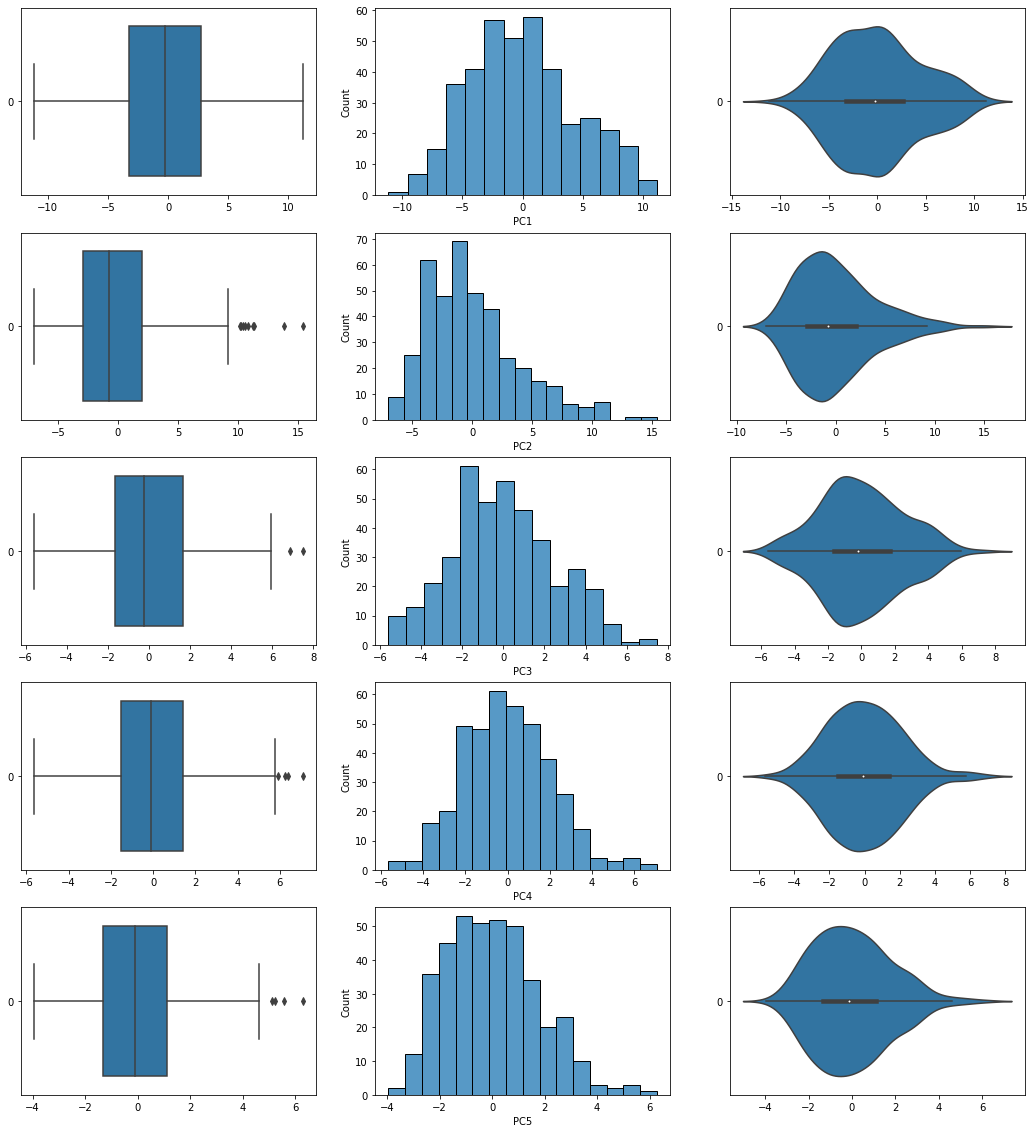

In [201]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 20))

for i in range (1, 6):
    sns.boxplot(data = df[f"PC{i}"], orient = "h", ax = axes[i - 1, 0])
    sns.histplot(data = df[f"PC{i}"], ax = axes[i - 1, 1])
    sns.violinplot(data = df[f"PC{i}"], orient = "h", ax = axes[i - 1, 2])

We notice most principal components (pcs) have a roughly even distribtution, with sum pcs being left skewed these are interestingly the same pcs that appear to have a greater number of anomalies

In [202]:
# find number of anomalalies for each column
q1 = df.quantile(0.25)
q2 = df.quantile(0.75)
((df < (q1 - 1.5 * (q2 - q1))) | (df > (q2 + 1.5 * (q2 - q1)))).sum()


/var/folders/vn/ptt2zv55465dbp8fs33z2cqw0000gn/T/ipykernel_1928/2059429225.py:4: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



PC1       0
PC2       9
PC3       2
PC4       4
PC5       4
Player    0
Team      0
dtype: int64

Given our data has almost 400 players the small percentage of anomalies is not a real concern

In order to get a sense of whether our data has clustering tendencies we first attempt a visualisation approach

In [203]:
# comparing our most significant PCS
fig1 = go.Scatter(x=df['PC1'],
                  y=df['PC2'],
                  mode='markers')

mylayout = go.Layout(xaxis=dict(title="PC1"),
                     yaxis=dict( title="PC2"))

fig = go.Figure(
    data=[fig1],
    layout=mylayout,
)
fig.show()

Our top 2 pcs combined do not show any obvious clusters. We continue adding more features

In [204]:
fig1 = go.Scatter3d(x=df['PC1'],
                    y=df['PC2'],
                    z=df['PC3'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

fig = go.Figure(
    data=[fig1],
    layout=mylayout,
)
fig.show()

Having run out of spatial dimensions, we use color to represent the 4th pc

In [205]:
markercolor = df['PC4']

fig1 = go.Scatter3d(x=df['PC1'],
                    y=df['PC2'],
                    z=df['PC3'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

fig = go.Figure(
    data=[fig1],
    layout=mylayout,
)
fig.show()

For the 5th pc we intend to use size. However to do this we must first linearly shift all values to be greater than zero. Although some information is lost in this process, we carry on to see if there are any interesting observations that could be made.

In [206]:
tempPc5 = df['PC5'] + abs(df["PC5"].min()) + 1

markercolor = df['PC4']
markersize = tempPc5*1.5

fig1 = go.Scatter3d(x=df['PC1'],
                    y=df['PC2'],
                    z=df['PC3'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                ),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

fig = go.Figure(
    data=[fig1],
    layout=mylayout,
)
fig.show()

Although we may at this point attempt to draw circles in our data and try to identify groups it seems still rather difficult to do so visually. As such we use hopkins statistic to check whether our data truly has any intrinsic clustering tendency

In [207]:
# conducting hopkins test
df.drop(['Player','Team'],axis=1,inplace=True)
scaler = StandardScaler()
scaledDf = scaler.fit_transform(df)
scaledDf = pd.DataFrame(scaledDf, columns = ['PC1','PC2','PC3','PC4','PC5'])

hopkins(scaledDf, df.shape[0])

0.31455641949696156

Our hopkins statistic has a value of about 0.3. A statistic value of 1 would have indicated randomly distributed data while a statistic of 0 would indicated a high probability of the presence of clusters. We find a value of 0.3 acceptable to conclude that our data does in fact have natural clusters